# <center>**RADIOMICS EXTRACTION - Clean Radiomic Features - STAPE**</center>

(*Step 7*)

## **Radiomics Workflow:**
  
  **1. Download** DICOM images and convert to **NRRD.**

  **2.** Perform **target segmentations** and save in **NRRD.**
  
  **3.** Perform a **first Radiomic Feature** ***Dummy*** **Extraction,** to:
    
  - Detect **erros in segmentations**: only one dimension, no label 1, only one segmented voxel...
  - Analyze **bin wdith**.


  **4. Analyze** and **correct mask errors.**

  **5. Adjust binwith.**
   - **Tune featureextractor param file.**


  **6.** Perform **final Radiomic Feature Extraction.**

  **7. Clean Radiomic Features.**

  **8. Merge** with **labels** and **clinical data.**

  **9. Descriptive Statistics.**

  **10. Inferential Statistics.**

  **11. Machine Learning.**

## **CLEAN RADIOMIC FEATURES DATAFRAME**

0.   Environment **configuration**.
1.   **Load data.**
2.   **Filter Radiomic Features** from extraction data.
3.   Check **datatypes.**
4.   Identify and remove **non-useful variables.**

   * 4.1. Columns with too much **<code>NaN</code>**.
   * 4.2. Columns with **low variance** - **low number of unique values** (only one different value...).
    
5.   **Dimensionality Reduction.**

   * 5.1. **Correlated** variables.

6. **Adapt dataframe to merge** with clinical data and labels.

7. **Save Radiomic features cleaned.**

In [1]:
# Install libraries
#pip install openpyxl

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

### **0. Environment configuration**

#### Set the working directory

In [3]:
# Set working directory
wd = '/Users/pablomenendezfernandez-miranda/Proyecto Otosclerosis/'
os.chdir(wd)

print(f'Directorio actual: {os.getcwd()}')

# Check directory files
print(f'Directory files: {os.listdir(wd)}')

Directorio actual: /Users/pablomenendezfernandez-miranda/Proyecto Otosclerosis
Directory files: ['Tables', 'Databases', '.DS_Store', 'Episodes', 'Figures', 'Notebooks']


#### Mount Drive (if executed on Google Colab)

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

### **1. Load data**

In [5]:
# Load pandas dataframe
df_dir= 'Databases/4_1_df_radiomics_STAPES_tuned_final_features.csv'
df= pd.read_csv(df_dir, na_values='nan')

print(df.shape)
df.head(4)

(89, 2054)


,Image_Segmentation,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,...,lbp-3D-k_gldm_LargeDependenceLowGrayLevelEmphasis,lbp-3D-k_gldm_LowGrayLevelEmphasis,lbp-3D-k_gldm_SmallDependenceEmphasis,lbp-3D-k_gldm_SmallDependenceHighGrayLevelEmphasis,lbp-3D-k_gldm_SmallDependenceLowGrayLevelEmphasis,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength
0,EPI_0001_STAPES.nrrd,3.1.0a2.post14+gaab3c6f,1.26.4,2.4.0,1.7.0,3.12.4,"{'minimumROIDimensions': 1, 'minimumROISize': ...","{'Original': {'binWidth': 25.01}, 'Square': {'...",1310b8441367f403dccd0241fde06dd70966c56a,3D,...,1.519841,0.305556,0.504960,6.876984,0.181796,0.225694,0.646154,8.171429,0.338516,7.488722
1,EPI_0002_STAPES.nrrd,3.1.0a2.post14+gaab3c6f,1.26.4,2.4.0,1.7.0,3.12.4,"{'minimumROIDimensions': 1, 'minimumROISize': ...","{'Original': {'binWidth': 25.01}, 'Square': {'...",64fb22f54e86a46714e45ec0a26705a81f50b639,3D,...,0.900185,0.316852,0.601852,6.240741,0.217315,0.426471,0.413793,10.819444,0.417824,3.228070
2,EPI_0003_STAPES.nrrd,3.1.0a2.post14+gaab3c6f,1.26.4,2.4.0,1.7.0,3.12.4,"{'minimumROIDimensions': 1, 'minimumROISize': ...","{'Original': {'binWidth': 25.01}, 'Square': {'...",c37a6f6b17a1a89cd5f06d640fb8e33dc6219c6e,3D,...,4.000000,1.000000,0.250000,0.250000,0.250000,0.000000,1000000.000000,0.000000,0.000000,0.000000
3,EPI_0004_STAPES.nrrd,3.1.0a2.post14+gaab3c6f,1.26.4,2.4.0,1.7.0,3.12.4,"{'minimumROIDimensions': 1, 'minimumROISize': ...","{'Original': {'binWidth': 25.01}, 'Square': {'...",5dce836924eb76ab17bb61896784da9f4cd31cbd,3D,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1000000.000000,0.000000,0.000000,0.000000


### **2. Filter Radiomic Features from extraction data**

In [6]:
# Identify extraction data columns
idx_to_delete= []
idx= -1
for key, value in df.dtypes.items():
  idx= idx+1
  if (key.startswith('diagnostics_')) or (value != 'float64'):
    print(f'{idx}_{key}: {value}')
    idx_to_delete.append(idx)

0_Image_Segmentation: object
1_diagnostics_Versions_PyRadiomics: object
2_diagnostics_Versions_Numpy: object
3_diagnostics_Versions_SimpleITK: object
4_diagnostics_Versions_PyWavelet: object
5_diagnostics_Versions_Python: object
6_diagnostics_Configuration_Settings: object
7_diagnostics_Configuration_EnabledImageTypes: object
8_diagnostics_Image-original_Hash: object
9_diagnostics_Image-original_Dimensionality: object
10_diagnostics_Image-original_Spacing: object
11_diagnostics_Image-original_Size: object
12_diagnostics_Image-original_Mean: float64
13_diagnostics_Image-original_Minimum: float64
14_diagnostics_Image-original_Maximum: float64
15_diagnostics_Mask-original_Hash: object
16_diagnostics_Mask-original_Spacing: object
17_diagnostics_Mask-original_Size: object
18_diagnostics_Mask-original_BoundingBox: object
19_diagnostics_Mask-original_VoxelNum: int64
20_diagnostics_Mask-original_VolumeNum: int64
21_diagnostics_Mask-original_CenterOfMassIndex: object
22_diagnostics_Mask-origina

In [7]:
df_features= df.drop(df.columns[idx_to_delete[1:]], axis = 1)
df_features.head(4)

,Image_Segmentation,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,lbp-3D-k_gldm_LargeDependenceLowGrayLevelEmphasis,lbp-3D-k_gldm_LowGrayLevelEmphasis,lbp-3D-k_gldm_SmallDependenceEmphasis,lbp-3D-k_gldm_SmallDependenceHighGrayLevelEmphasis,lbp-3D-k_gldm_SmallDependenceLowGrayLevelEmphasis,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength
0,EPI_0001_STAPES.nrrd,8.833900e-01,3.335104e-01,1.239370e+00,3.716135,3.162278,3.162278,3.162278,3.741657,3.416667,...,1.519841,0.305556,0.504960,6.876984,0.181796,0.225694,0.646154,8.171429,0.338516,7.488722
1,EPI_0002_STAPES.nrrd,7.900840e-01,3.505154e-01,1.237530e+00,3.530601,3.162278,3.162278,3.162278,3.316625,2.166667,...,0.900185,0.316852,0.601852,6.240741,0.217315,0.426471,0.413793,10.819444,0.417824,3.228070
2,EPI_0003_STAPES.nrrd,8.231927e-09,1.281975e-16,4.440892e-16,3.464102,1.414214,1.414214,1.414214,2.449490,0.333333,...,4.000000,1.000000,0.250000,0.250000,0.250000,0.000000,1000000.000000,0.000000,0.000000,0.000000
3,EPI_0004_STAPES.nrrd,0.000000e+00,0.000000e+00,0.000000e+00,4.000000,3.000000,1.000000,3.000000,3.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1000000.000000,0.000000,0.000000,0.000000


### **3. Check datatypes**

In [8]:
pd.DataFrame(df_features.dtypes.value_counts())

,count
float64,2016
object,1


### **4. Identify and remove non-useful variables.**

In [9]:
# PRINT FULL DATAFRAME

def df_show_full(show):
  if show == True:
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
  if show == False:
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')

#### **4.1. Columns with too much <code>NaN</code>**

In [10]:
df_show_full(True)

n_nan= 12
null_values= df_features.isnull().sum()
pd.DataFrame(null_values[null_values > n_nan].sort_values(ascending=False))

,0
original_firstorder_RobustMeanAbsoluteDeviation,17
square_firstorder_RobustMeanAbsoluteDeviation,17
lbp-3D-m2_firstorder_RobustMeanAbsoluteDeviation,17
wavelet-LLL_firstorder_RobustMeanAbsoluteDeviation,17
wavelet-HHH_firstorder_RobustMeanAbsoluteDeviation,17
wavelet-HHL_firstorder_RobustMeanAbsoluteDeviation,17
wavelet-HLH_firstorder_RobustMeanAbsoluteDeviation,17
wavelet-HLL_firstorder_RobustMeanAbsoluteDeviation,17
wavelet-LHH_firstorder_RobustMeanAbsoluteDeviation,17
wavelet-LHL_firstorder_RobustMeanAbsoluteDeviation,17


In [11]:
# Delete columns with more than 40% of NaN values
nan_threshold = 0.4 * len(df_features)
df_features_nonan= df_features.dropna(axis=1, thresh=nan_threshold, inplace=False)

print(f'Dataframe shape pre-processing: {df_features.shape}')
print(f'Dataframe shape post-processing: {df_features_nonan.shape}')

Dataframe shape pre-processing: (89, 2017)
Dataframe shape post-processing: (89, 2017)


#### **4.2. Columns with low variance - low number of unique values (only one different value...)**


In [12]:
# Remove variables with a very low variance (2%)
var_threshold= 0.02

# Exclude fisrt column (object type)
object_cols= ['Image_Segmentation']
df_features_vars= df_features_nonan.select_dtypes(include=[float, int]).var()

# Select features with more than var_threshold variance
features_to_preserve= list(df_features_vars[df_features_vars > var_threshold].index)
df_features_filter= df_features_nonan[object_cols + features_to_preserve]

# Removed variables
removed_lowvar= list(df_features_vars[df_features_vars <= var_threshold].index)

# Print report
print(f'{len(removed_lowvar)} variables removed (high number of NaN)')
print(f'\nDataframe shape pre-processing: {df_features_nonan.shape}')
print(f'Dataframe shape post-processing: {df_features_filter.shape}')
print('')
print(f'\nRemoved variables (high number of NaN): {removed_lowvar}')

649 variables removed (high number of NaN)

Dataframe shape pre-processing: (89, 2017)
Dataframe shape post-processing: (89, 1368)


Removed variables (high number of NaN): ['original_shape_Flatness', 'original_shape_Sphericity', 'original_firstorder_Uniformity', 'original_glcm_JointEnergy', 'original_glcm_Imc1', 'original_glcm_Imc2', 'original_glcm_Idm', 'original_glcm_Idmn', 'original_glcm_Id', 'original_glcm_Idn', 'original_glcm_InverseVariance', 'original_glcm_MaximumProbability', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunLowGrayLevelEmphasis', 'original_glrlm_LowGrayLevelRunEmphasis', 'original_glrlm_RunLengthNonUniformityNormalized', 'original_glrlm_RunPercentage', 'original_glrlm_RunVariance', 'original_glrlm_ShortRunEmphasis', 'original_glrlm_ShortRunLowGrayLevelEmphasis', 'original_glszm_GrayLevelNonUniformity', 'original_glszm_GrayLevelNonUniformityNormalized', 'original

### **5. Dimensionality Reduction**

#### **5.1. Correlated columns**

In [13]:
# Remove one of each pair of highly correlated variables
corr_test= 'pearson'
#corr_test= 'spearman'
corr_threshold= 0.90

# Exclude fisrt column (object type) - use df_numeric
object_cols= ['Image_Segmentation']
df_features_numeric= df_features_filter.select_dtypes(include=[float, int])

# Compute corr matrix and select the upper hemimatrix (symetrical)
corr_matrix= df_features_numeric.corr(method='pearson').abs()
upper_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Select highly correlated vars
corr_vars= [column for column in upper_matrix.columns if any(upper_matrix[column] > corr_threshold)]

# Remove higly correlated variables - the second of each corr_pair (drop list adds columns, not rows)
df_features_decorr= df_features_filter.drop(columns=corr_vars, inplace=False)

# Print report
print(f'{len(corr_vars)} removed variables (corr_{corr_test} > {corr_threshold})')
print(f'\nDataframe shape pre-processing: {df_features_filter.shape}')
print(f'Dataframe shape post-processing: {df_features_decorr.shape}')
print(f'\nRemoved variables (corr_{corr_test} > {corr_threshold}): {corr_vars}')

911 removed variables (corr_pearson > 0.9)

Dataframe shape pre-processing: (89, 1368)
Dataframe shape post-processing: (89, 457)

Removed variables (corr_pearson > 0.9): ['original_shape_MinorAxisLength', 'original_shape_SurfaceArea', 'original_shape_VoxelVolume', 'original_firstorder_Entropy', 'original_firstorder_Maximum', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RootMeanSquared', 'original_firstorder_TotalEnergy', 'original_firstorder_Variance', 'original_glcm_ClusterTendency', 'original_glcm_DifferenceAverage', 'original_glcm_JointEntropy', 'original_glcm_SumEntropy', 'original_glcm_SumSquares', 'original_glrlm_GrayLevelVariance', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glrlm_RunEntropy', 'original_glrlm_RunLengthNonUniformity', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 'original_glszm_GrayLevelVariance', 'original_glszm_HighGrayLevelZoneEmphasis', 'original_glszm_LargeAreaHig

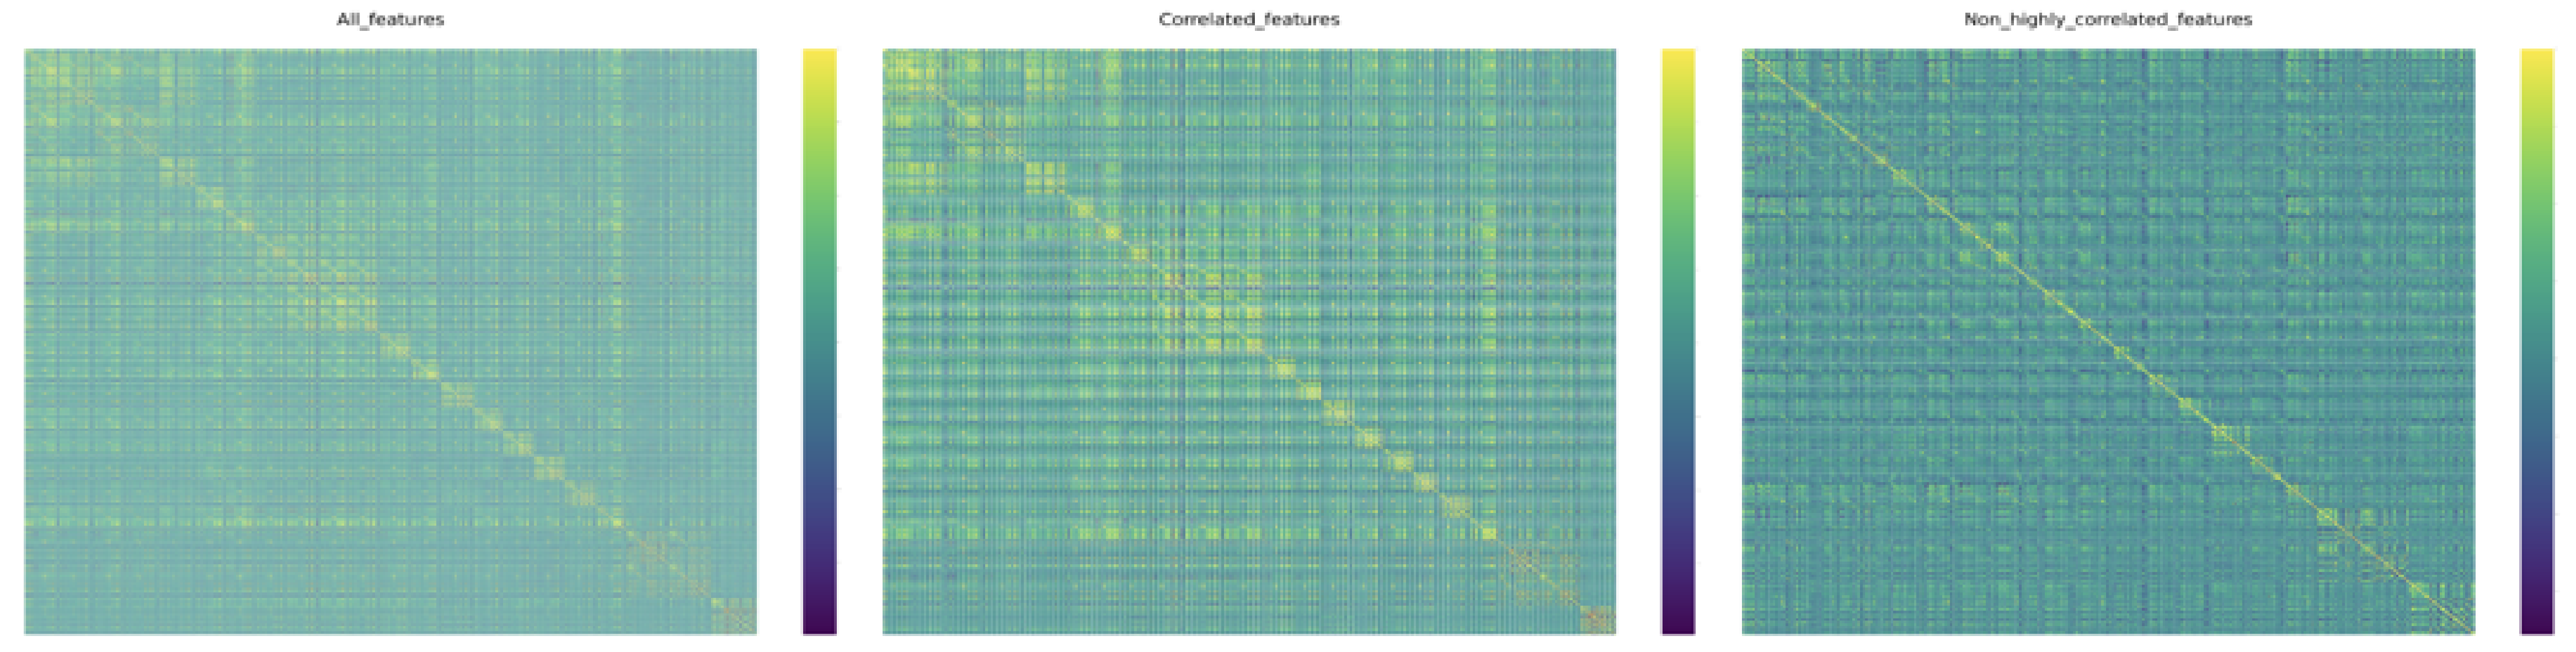

In [14]:
# Plotting correlation matrix

fig, axes = plt.subplots(1, 3, figsize=(300, 80))

titles = ['All_features', 'Correlated_features', 'Non_highly_correlated_features']
corr_matrix_l= [df_features_numeric.corr(method='pearson'),
                df_features_numeric[corr_vars].corr(method='pearson'),
                df_features_decorr.iloc[:,1:].corr(method='pearson')] # Remove first column

for i, ax in enumerate(axes):
    sns.heatmap(corr_matrix_l[i], annot=False, cmap='viridis', linewidths=0.5, ax=ax)

    ax.set_title(titles[i], fontsize=150, pad=220)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.tight_layout()
plt.show()

# Save plot
#fig.set_size_inches(10.67, 13.33) # resizing the image
#dir= 'Figures/'
#fig.savefig(dir + '1_corr_STAPES_feature_selection_process.png', bbox_inches='tight', dpi=600)

### **6. Adapt dataframe to merge with clinical data and labels**

In [15]:
# Add radiomic label (R) and segment label (STAPE) to all radiomic features
old_new_names_dict= dict([(col_name, 'R_STAPES_' + col_name) for col_name in df_features_decorr.columns])

# Rename columns
df_features_cleaned= df_features_decorr.rename(columns=old_new_names_dict)

# Extract EPI_CODES
epi_codes= [image_segmentation[:8] for image_segmentation in df_features_cleaned['R_STAPES_Image_Segmentation']]

# Add EPI_CODE column in first position
df_features_cleaned.insert(loc=0, column='EPI_CODE', value=epi_codes, allow_duplicates=False)

# Remove the old column
df_features_cleaned= df_features_cleaned.drop('R_STAPES_Image_Segmentation', axis=1)

print(df_features_cleaned.shape)
df_features_cleaned.head()

(89, 457)


,EPI_CODE,R_STAPES_original_shape_Elongation,R_STAPES_original_shape_LeastAxisLength,R_STAPES_original_shape_MajorAxisLength,R_STAPES_original_shape_Maximum2DDiameterColumn,R_STAPES_original_shape_Maximum2DDiameterRow,R_STAPES_original_shape_Maximum2DDiameterSlice,R_STAPES_original_shape_Maximum3DDiameter,R_STAPES_original_shape_MeshVolume,R_STAPES_original_shape_SurfaceVolumeRatio,R_STAPES_original_firstorder_10Percentile,R_STAPES_original_firstorder_90Percentile,R_STAPES_original_firstorder_Energy,R_STAPES_original_firstorder_InterquartileRange,R_STAPES_original_firstorder_Kurtosis,R_STAPES_original_firstorder_MeanAbsoluteDeviation,R_STAPES_original_firstorder_Mean,R_STAPES_original_firstorder_Median,R_STAPES_original_firstorder_RobustMeanAbsoluteDeviation,R_STAPES_original_firstorder_Skewness,R_STAPES_original_glcm_Autocorrelation,R_STAPES_original_glcm_JointAverage,R_STAPES_original_glcm_ClusterProminence,R_STAPES_original_glcm_ClusterShade,R_STAPES_original_glcm_Contrast,R_STAPES_original_glcm_Correlation,R_STAPES_original_glcm_DifferenceEntropy,R_STAPES_original_glcm_DifferenceVariance,R_STAPES_original_ngtdm_Busyness,R_STAPES_original_ngtdm_Coarseness,R_STAPES_original_ngtdm_Complexity,R_STAPES_original_ngtdm_Contrast,R_STAPES_original_ngtdm_Strength,R_STAPES_square_firstorder_10Percentile,R_STAPES_square_firstorder_Entropy,R_STAPES_square_firstorder_Kurtosis,R_STAPES_square_firstorder_Median,R_STAPES_square_firstorder_RobustMeanAbsoluteDeviation,R_STAPES_square_firstorder_Skewness,R_STAPES_square_glcm_Autocorrelation,R_STAPES_square_glcm_ClusterProminence,R_STAPES_square_glcm_Correlation,R_STAPES_square_glcm_DifferenceVariance,R_STAPES_square_glcm_Idm,R_STAPES_square_glrlm_GrayLevelNonUniformity,R_STAPES_square_glrlm_LongRunLowGrayLevelEmphasis,R_STAPES_square_glszm_GrayLevelNonUniformity,R_STAPES_square_glszm_LargeAreaEmphasis,R_STAPES_square_gldm_DependenceNonUniformityNormalized,R_STAPES_square_ngtdm_Busyness,R_STAPES_square_ngtdm_Contrast,R_STAPES_square_ngtdm_Strength,R_STAPES_squareroot_firstorder_InterquartileRange,R_STAPES_squareroot_firstorder_Kurtosis,R_STAPES_squareroot_firstorder_MeanAbsoluteDeviation,R_STAPES_squareroot_firstorder_Range,R_STAPES_squareroot_firstorder_Skewness,R_STAPES_squareroot_glcm_Correlation,R_STAPES_squareroot_glcm_DifferenceVariance,R_STAPES_squareroot_glszm_LargeAreaEmphasis,R_STAPES_squareroot_gldm_LargeDependenceLowGrayLevelEmphasis,R_STAPES_squareroot_ngtdm_Complexity,R_STAPES_logarithm_firstorder_90Percentile,R_STAPES_logarithm_firstorder_Maximum,R_STAPES_logarithm_glcm_ClusterProminence,R_STAPES_logarithm_glcm_ClusterShade,R_STAPES_logarithm_glcm_Correlation,R_STAPES_logarithm_glcm_JointEntropy,R_STAPES_logarithm_glcm_Idm,R_STAPES_logarithm_glrlm_GrayLevelNonUniformity,R_STAPES_logarithm_glrlm_LongRunLowGrayLevelEmphasis,R_STAPES_logarithm_glszm_GrayLevelNonUniformity,R_STAPES_logarithm_glszm_LargeAreaEmphasis,R_STAPES_logarithm_glszm_SizeZoneNonUniformity,R_STAPES_logarithm_ngtdm_Busyness,R_STAPES_logarithm_ngtdm_Strength,R_STAPES_exponential_firstorder_10Percentile,R_STAPES_exponential_firstorder_Entropy,R_STAPES_exponential_firstorder_InterquartileRange,R_STAPES_exponential_firstorder_Kurtosis,R_STAPES_exponential_firstorder_Minimum,R_STAPES_exponential_glcm_ClusterProminence,R_STAPES_exponential_glcm_Correlation,R_STAPES_exponential_glcm_JointEntropy,R_STAPES_exponential_glcm_Idm,R_STAPES_exponential_glcm_InverseVariance,R_STAPES_exponential_glrlm_GrayLevelNonUniformity,R_STAPES_exponential_glrlm_LongRunLowGrayLevelEmphasis,R_STAPES_exponential_glszm_GrayLevelNonUniformity,R_STAPES_exponential_glszm_LargeAreaEmphasis,R_STAPES_exponential_glszm_LargeAreaLowGrayLevelEmphasis,R_STAPES_exponential_glszm_SizeZoneNonUniformity,R_STAPES_exponential_ngtdm_Busyness,R_STAPES_exponential_ngtdm_Contrast,R_STAPES_gradient_firstorder_10Percentile,R_STAPES_gradient_firstorder_90Percentile,R_STAPES_gradient_firstorder_Energy,R_STAPES_gradient_firstorder_InterquartileRange,R_STAPES_gradient

### **7. Save Radiomic features cleaned**

In [16]:
# Save data
save_path= 'Databases/'

df_features_cleaned.to_excel(save_path + '5_1_df_radiomics_STAPES_tuned_final_features_cleaned.xlsx')
df_features_cleaned.to_csv(save_path + '5_1_df_radiomics_STAPES_tuned_final_features_cleaned.csv')
df_features_cleaned.to_feather(save_path + '5_1_df_radiomics_STAPES_tuned_final_features_cleaned.feather')